In [28]:

d = 'done' 

In [20]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# fetch dataset 
predict_students_dropout_and_academic_success = fetch_ucirepo(id=697)
  
# data (as pandas dataframes) 
X = predict_students_dropout_and_academic_success.data.features 
y = predict_students_dropout_and_academic_success.data.targets 
  
# metadata 
print(predict_students_dropout_and_academic_success.metadata) 
  
# variable information 
print(predict_students_dropout_and_academic_success.variables) 

data = pd.concat([X, y], axis=1)


{'uci_id': 697, 'name': "Predict Students' Dropout and Academic Success", 'repository_url': 'https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success', 'data_url': 'https://archive.ics.uci.edu/static/public/697/data.csv', 'abstract': "A dataset created from a higher education institution (acquired from several disjoint databases) related to students enrolled in different undergraduate degrees, such as agronomy, design, education, nursing, journalism, management, social service, and technologies.\nThe dataset includes information known at the time of student enrollment (academic path, demographics, and social-economic factors) and the students' academic performance at the end of the first and second semesters. \nThe data is used to build classification models to predict students' dropout and academic sucess. The problem is formulated as a three category classification task, in which there is a strong imbalance towards one of the classes.", 'area': 'Social Sc

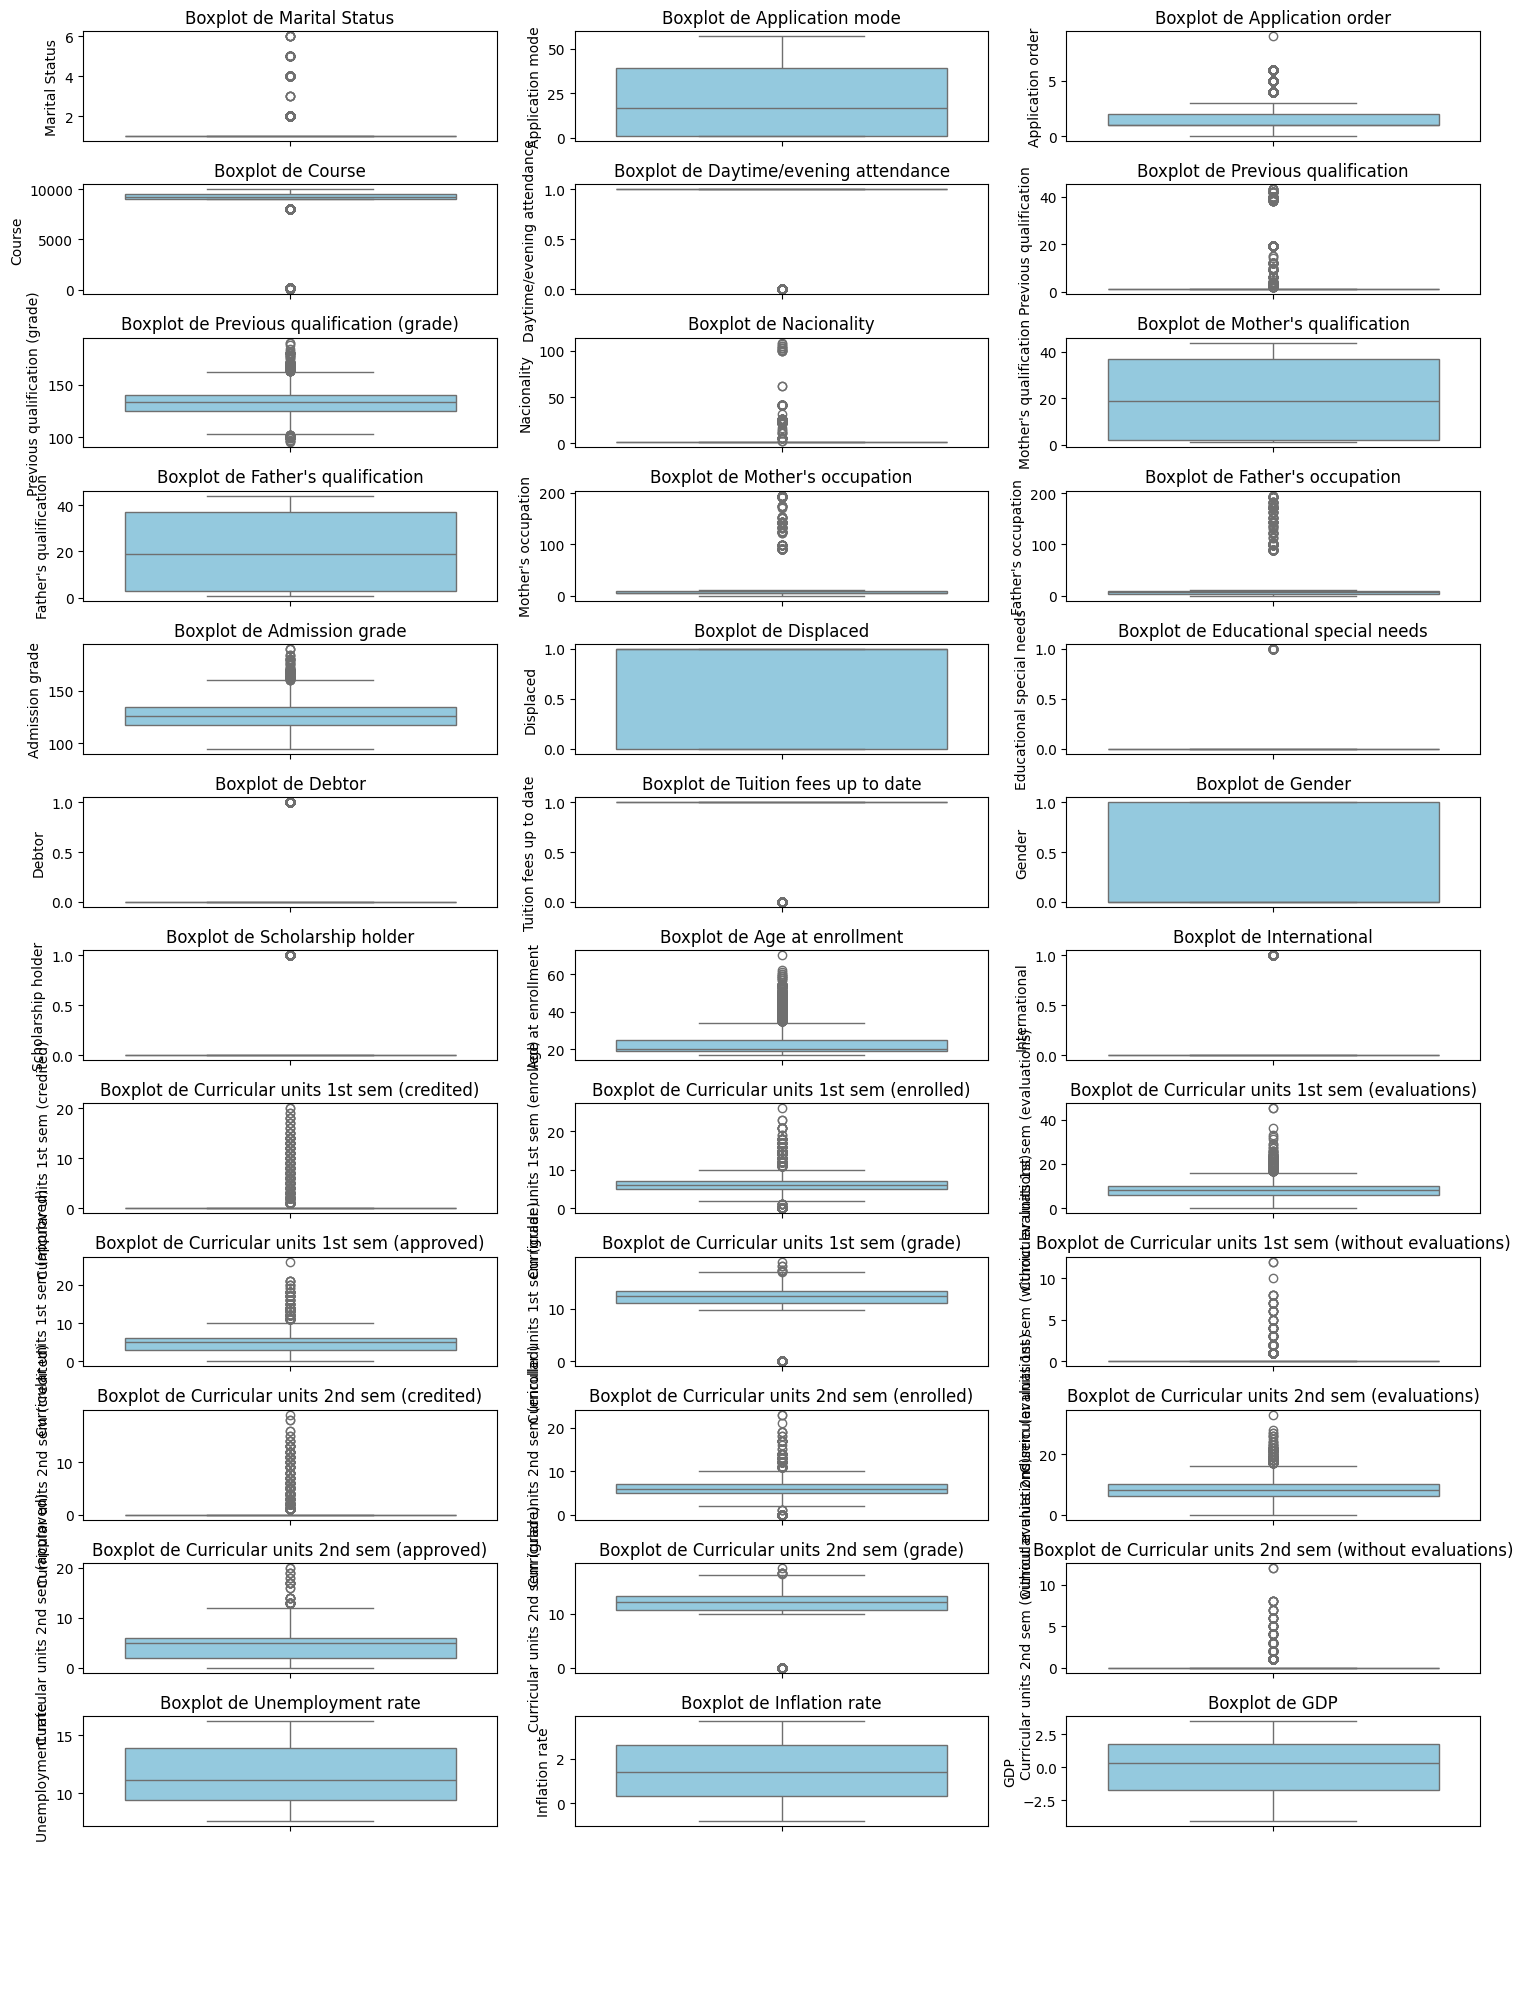

In [10]:
# Boxplots pour toutes les variables
plt.figure(figsize=(15, 20))
for i, column in enumerate(data.columns, 1):
    plt.subplot(len(data.columns) // 3 + 1, 3, i)
    if data[column].dtype in ['float64', 'int64']:
        sns.boxplot(y=data[column], color='skyblue')
        plt.title(f'Boxplot de {column}')
    else:
        plt.axis('off')  # Ignore les colonnes non numériques
plt.tight_layout()
plt.show()

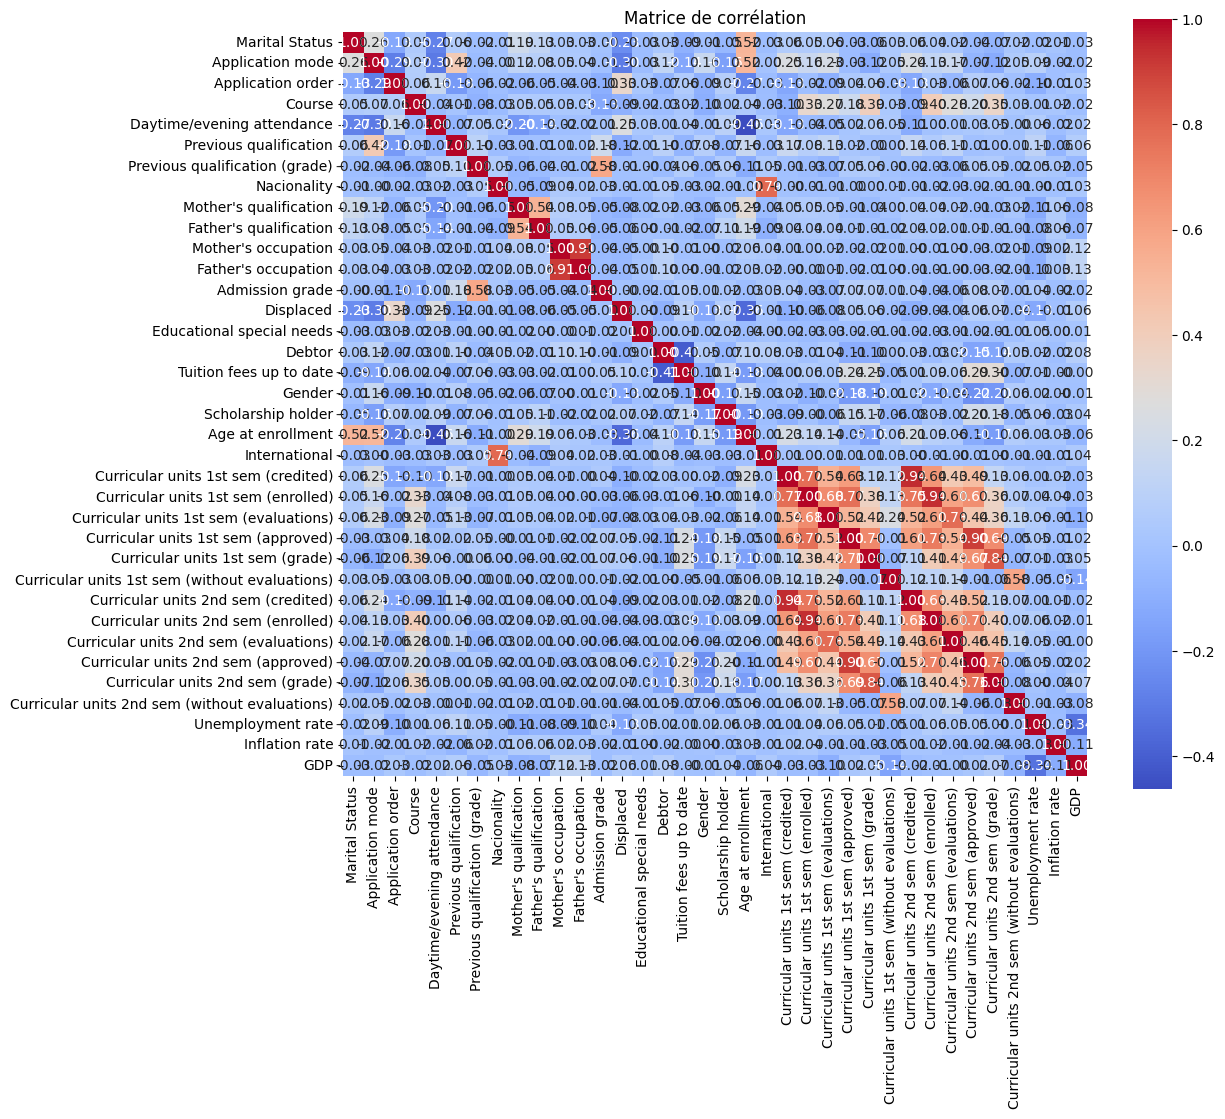

In [11]:
# Matrice de corrélation
plt.figure(figsize=(12, 10))
numeric_data = data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Matrice de corrélation')
plt.show()


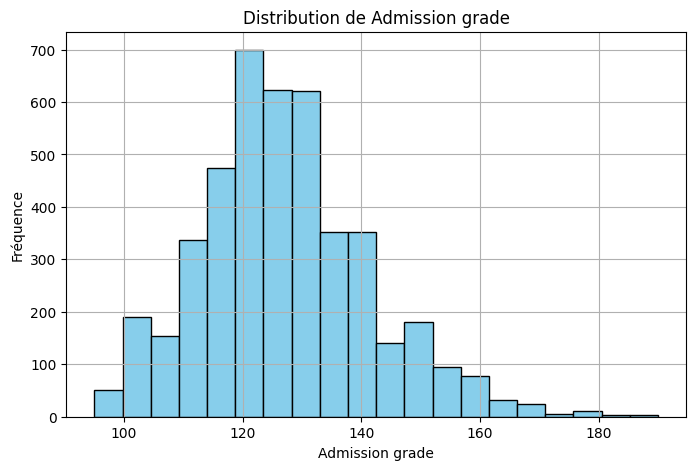

In [6]:
column_name = 'Admission grade'  # Remplacez par le nom d'une colonne spécifique si applicable
if column_name in data.columns:
    plt.figure(figsize=(8, 5))
    data[column_name].dropna().hist(bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribution de {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Fréquence')
    plt.show()
else:
    print(f"La colonne '{column_name}' n'existe pas dans les données.")

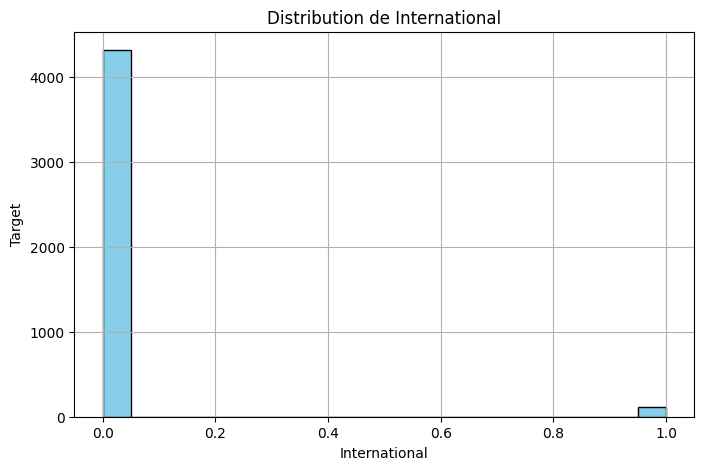

In [36]:
column_name = 'International'  # Remplacez par le nom d'une colonne spécifique si applicable
compare_name = 'Target'
plt.figure(figsize=(8, 5))
data[column_name].dropna().hist(bins=20, color='skyblue', edgecolor='black')
plt.title(f'Distribution de {column_name}')
plt.xlabel(column_name)
plt.ylabel(f'{compare_name}')
plt.show()

On remarque que pour les personnes qui sont international, elles ont beaucoup moins de réussite que les autres
Nous allons donc vérifier 

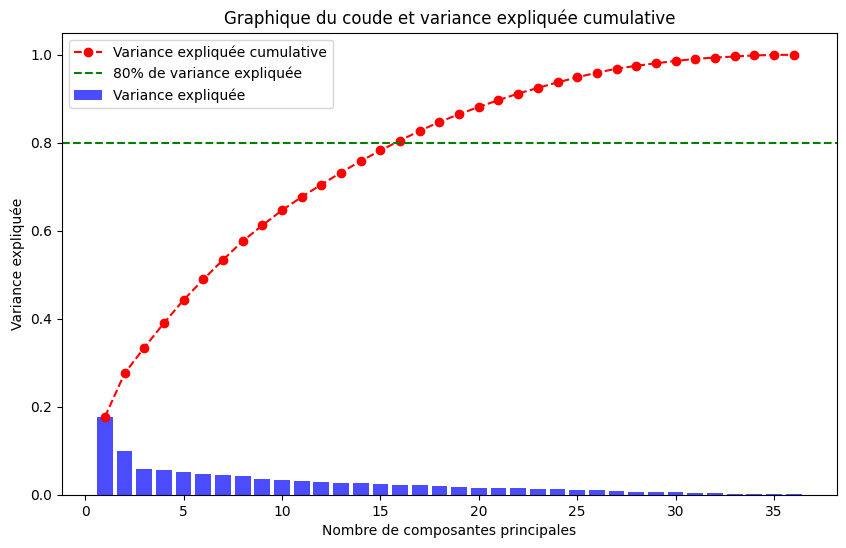

In [12]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Réduction de la dimensionnalité avec l'ACP
# Standardisation des données
numerical_data = data.select_dtypes(include=['float64', 'int64'])
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data.dropna())

# Application de l'ACP
pca = PCA()
pca_data = pca.fit_transform(scaled_data)

# Variance expliquée par chaque composante et graphique du coude
explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, color='blue', label='Variance expliquée')
plt.plot(range(1, len(explained_variance) + 1), explained_variance.cumsum(), marker='o', color='red', linestyle='--', label='Variance expliquée cumulative')
plt.axhline(y=0.80, color='green', linestyle='--', label='80% de variance expliquée')
plt.title('Graphique du coude et variance expliquée cumulative')
plt.xlabel('Nombre de composantes principales')
plt.ylabel('Variance expliquée')
plt.legend()
plt.show()


In [21]:
# Colonnes catégoriques
categorical_cols = [
    "Marital Status", "Application mode", "Daytime/evening attendance", 
    "Previous qualification", "Nacionality", "Mother's qualification", 
    "Father's qualification", "Mother's occupation", "Father's occupation", 
    "Gender", "Scholarship holder", "Target"
]


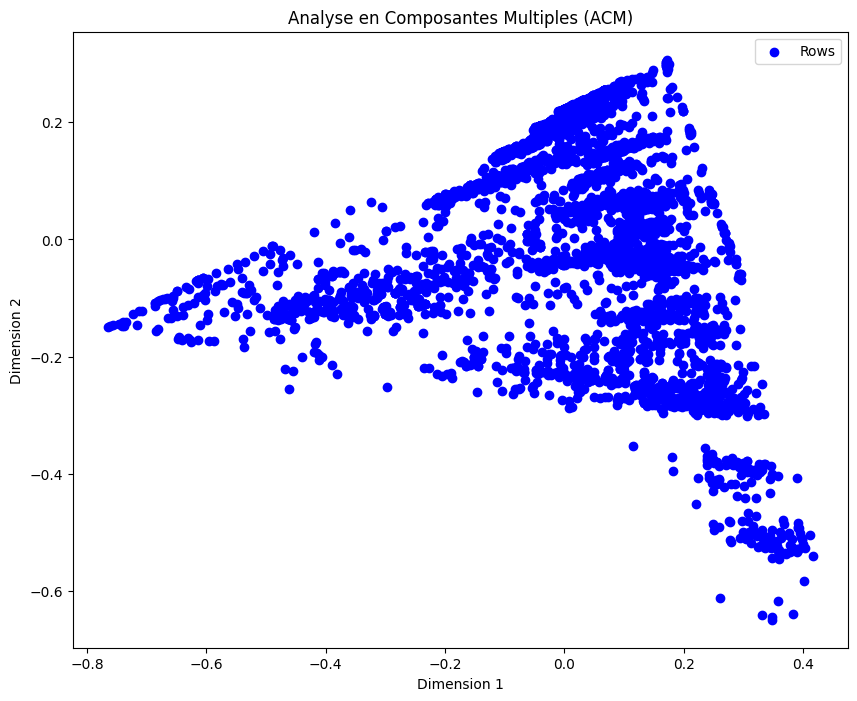

In [26]:

# Convertir les colonnes catégoriques en variables indicatrices (one-hot encoding)
data_dummies = pd.get_dummies(data[categorical_cols])

# Réaliser l'ACM
mca_ben = mca.MCA(data_dummies, benzecri=True)

# Visualiser les résultats
plt.figure(figsize=(10, 8))
plt.scatter(mca_ben.fs_r()[:, 0], mca_ben.fs_r()[:, 1], c='blue', label='Rows')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Analyse en Composantes Multiples (ACM)')
plt.legend()
plt.show()